In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.stats as stats
import matplotlib.gridspec as gridspec

from sklearn.linear_model import LinearRegression

import ml_helper
import ml_plots

In [2]:
COLORS = {
    'red': '#B56576',
    'blue': '#187795',
    'green': '#3F9A73' , #'#47B887', #'#38686A',
    'brown': '#DBCFB0',
    'yellow': '#D5C67A'
}



In [3]:
# load latest data if keyword is in the file name
hist_file_name = ml_helper.get_newest_file('histories/', name='CNN', extension=".json")
print(f"Loading {hist_file_name}")

Loading histories/CNN_history_20250215_170051.json


In [4]:
hist = None
with open(hist_file_name, 'r') as file:
    hist = json.load(file)

print(f"Keys: {hist.keys()}")

Keys: dict_keys(['train_loss', 'val_loss', 'train_rmse', 'val_rmse', 'val_labels', 'val_preds', 'test_labels', 'test_preds'])


In [5]:
labels = hist['test_labels']
preds= hist['test_preds']

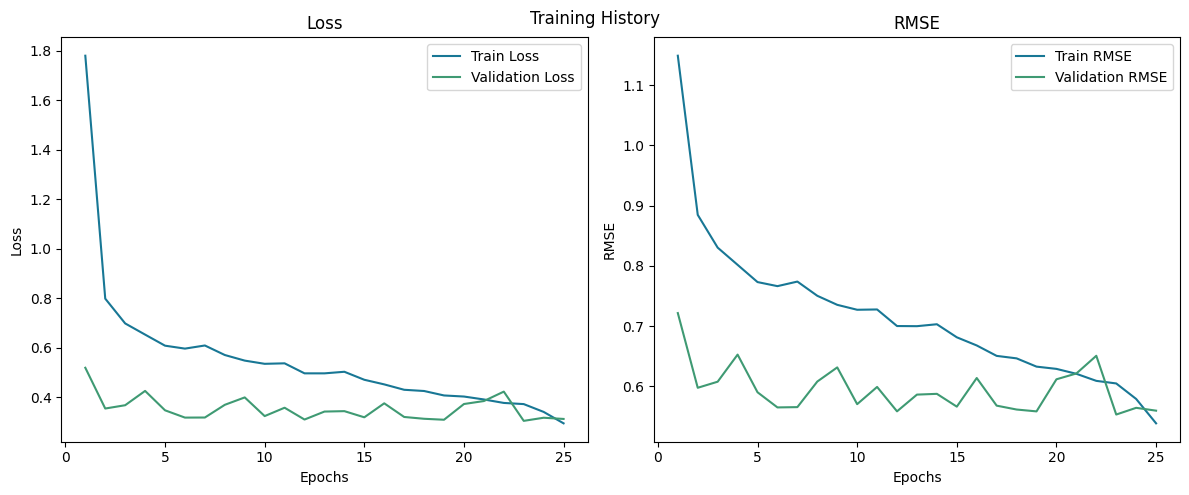

In [6]:
# plot the training history
ml_plots.plot_training_history(hist, colors=COLORS).show()

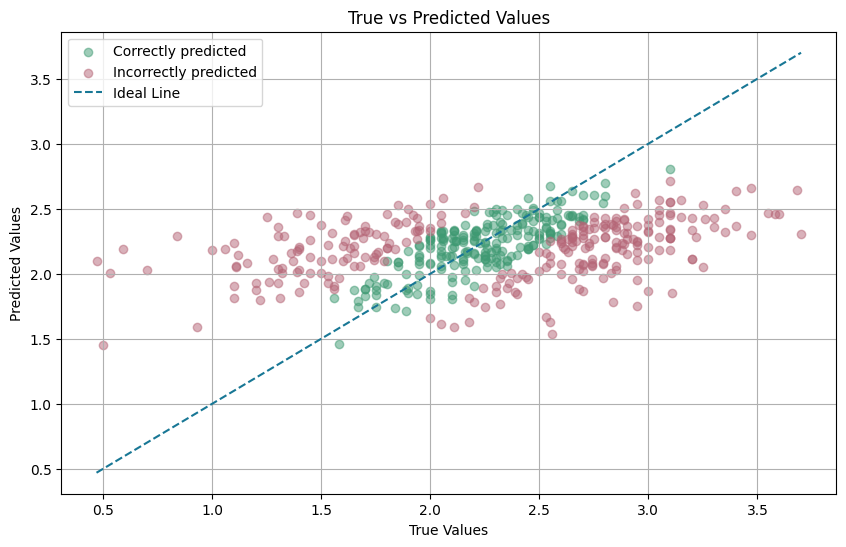

In [7]:
ml_plots.plot_predictions(labels, preds, colors=COLORS).show()

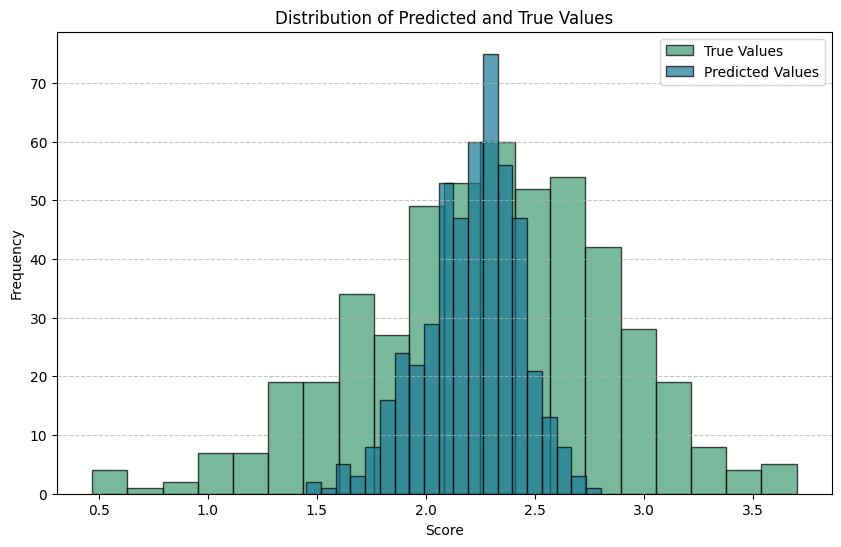

In [8]:
ml_plots.plot_distribution(labels, preds, colors=COLORS).show()


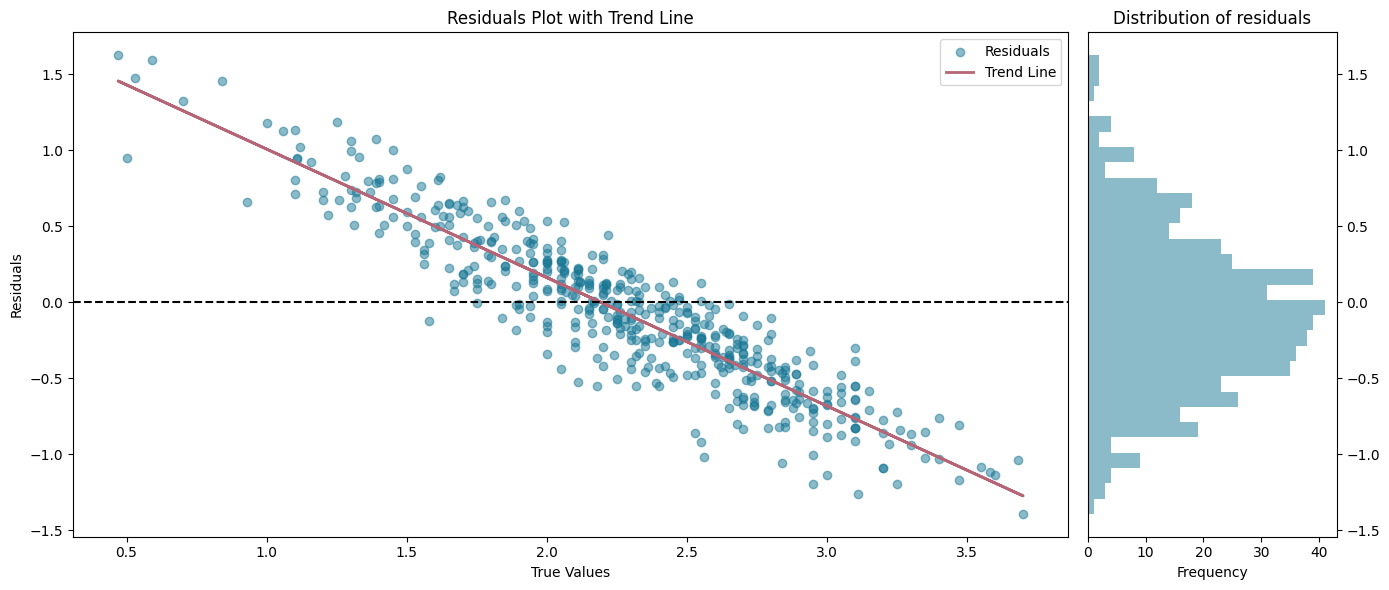

In [9]:


# Plot residuals with trend line
def plot_residuals(labels, preds):
    residuals = np.array(preds) - np.array(labels)
    
    fig = plt.figure(figsize=(14, 6))
    gs = gridspec.GridSpec(1, 2, width_ratios=[4, 1])

    # Main plot
    ax0 = plt.subplot(gs[0])
    ax0.scatter(labels, residuals, label='Residuals', color=COLORS['blue'], alpha=0.5)
    
    # Fit linear regression model to residuals
    labels_reshaped = np.array(labels).reshape(-1, 1)
    model = LinearRegression()
    model.fit(labels_reshaped, residuals)
    trend_line = model.predict(labels_reshaped)
    
    # Plot trend line
    ax0.plot(labels, trend_line, color=COLORS['red'], label='Trend Line', linewidth=2)
    
    ax0.set_xlabel('True Values')
    ax0.set_ylabel('Residuals')
    ax0.axhline(y=0, color='k', linestyle='--')
    ax0.set_title('Residuals Plot with Trend Line')
    ax0.legend()

    # Side plot for distribution of true values
    ax1 = plt.subplot(gs[1], sharey=ax0)
    ax1.hist(residuals, bins=30, alpha=0.5, color=COLORS['blue'], orientation='horizontal')
    ax1.set_xlabel('Frequency')
    ax1.set_title('Distribution of residuals')
    ax1.yaxis.tick_right()
    ax1.yaxis.set_label_position("right")

    plt.tight_layout()
    plt.show()

plot_residuals(labels, preds)

In [10]:
# Quantile-Quantile Plot

# def plot_qq(labels, preds):
#     residuals = np.array(preds) - np.array(labels)
    
#     # Generate a Normal Q-Q plot
#     fig = plt.figure(figsize=(8, 6))
#     stats.probplot(residuals, dist="norm", plot=plt)
#     plt.title('Q-Q plot')
#     plt.show()

# plot_qq(labels, preds)

In [11]:
epochs = 10
# Reaorder hist['val_preds'] from [{epoch:int: [val_preds]}, ...] to {epoch:int: [val_preds], ...}
val_preds = {}
for i, val_pred in enumerate(hist['val_preds'][:epochs]):
    val_preds[i] = hist['val_preds'][i].values()

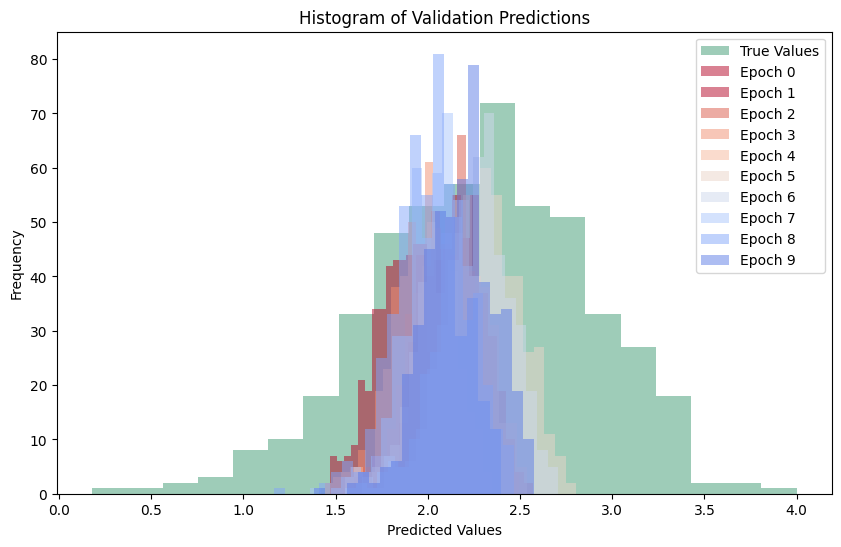

In [12]:


def plot_val_preds(val_preds, val_labels):
    plt.figure(figsize=(10, 6))
    plt.hist(val_labels, bins=20, alpha=0.5, label='True Values', color=COLORS['green'],)

    cmap = cm.get_cmap('coolwarm', len(val_preds))  # Use 'coolwarm' colormap for gradient from red to blue
    for epoch, preds in val_preds.items():
        color = cmap(len(val_preds) - epoch )  # Get color from colormap
        plt.hist(preds, bins=20, alpha=0.5, label=f'Epoch {epoch}', color=color)

    plt.xlabel('Predicted Values')
    plt.ylabel('Frequency')
    plt.title('Histogram of Validation Predictions')
    plt.legend()
    plt.show()

plot_val_preds(val_preds, hist['val_labels'])

In [13]:
# def plot_val_preds(val_preds, val_labels, grid_shape=(2, 5)):
#     num_epochs = len(val_preds)
#     fig, axs = plt.subplots(grid_shape[0], grid_shape[1], figsize=(20, 10), sharex=True, sharey=True)

#     for epoch, preds in val_preds.items():
#         row = epoch // grid_shape[1]
#         col = epoch % grid_shape[1]
#         ax = axs[row, col]
#         ax.hist(val_labels, bins=20, alpha=0.5, label='True Values', color='green')
#         ax.hist(preds, bins=20, alpha=0.5, label=f'Epoch {epoch}')
#         ax.set_xlabel('Predicted Values')
#         ax.set_ylabel('Frequency')
#         ax.set_title(f'Epoch {epoch}')
#         ax.legend()

#     plt.tight_layout()
#     plt.show()

# plot_val_preds(val_preds, hist['val_labels'])